In [31]:
import requests
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [32]:
query='covid'

url = f'https://thermofeeler-6hn6fqkota-uc.a.run.app/predict_query?query={query}&max_results=10'
response = requests.get(url).json()

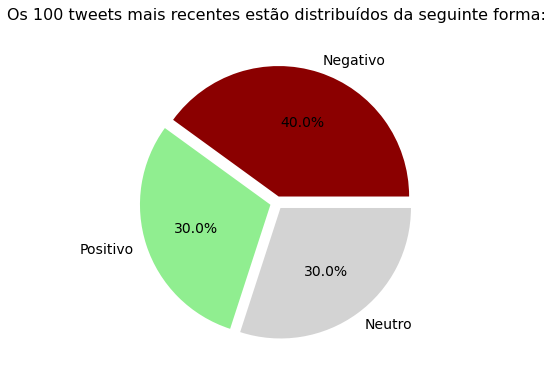

In [74]:
fig, ax = plt.subplots(figsize=(20,6))
ax.pie([response[1]['negative total'],response[1]['positive total'],response[1]['neutral total']],
        explode=[0.05,0.05,0.05],
        labels=['Negativo','Positivo','Neutro'],
        colors=['darkred','lightgreen','lightgray'],
        autopct='%1.1f%%',
        textprops={'fontsize': 14})

ax.set_title('Os 100 tweets mais recentes estão distribuídos da seguinte forma:',
             size=16,pad=20,loc='center')

plt.show();

In [34]:
def preproc_func(tweet):
    '''Does the preprocessing of the tweets'''

    # stopwords: remove articles, prepositions, conjunctions etc
    stopwords=['a','te','tu','tua','tuas','tém','um','uma','você','vocês','vos','à','às','ao','aos',
          'aquela','aquelas','aquele','aqueles','aquilo','as','até','com','como','da','das','de',
          'dela','delas','dele','deles','depois','do','dos','e','ela','elas','ele','eles','em',
          'entre','essa','essas','esse','esses','esta','eu','foi','fomos','for','fora','foram',
          'forem','formos','fosse','fossem','fui','fôramos','fôssemos', 'isso','isto','já','lhe',
          'lhes','me','mesmo','meu','meus','minha','minhas','muito','na','nas','no','nos','nossa',
          'nossas','nosso','nossos','num','numa','nós','o','os','para','pela','pelas','pelo','pelos',
          'por','qual','quando','que','quem','se','seja','sejam','sejamos','sem','serei','seremos',
          'seria','seriam','será','serão','seríamos','seu','seus','somos','sou','sua','suas','são',
          'só','também','ah','q','g','oh','eh','vc','tbm','também','tambem','voceh','você','voce','pra']

    tweet = tweet.lower() # lowercase

    tweet=re.sub('https?://[A-Za-z0-9./]+','',tweet) # remove links que começam com https?://
    tweet=re.sub('https://[A-Za-z0-9./]+','',tweet) # remove links que começam com https://
    tweet=re.sub('http://[A-Za-z0-9./]+','',tweet) # remove links que começam com http://

    tweet = re.sub(r'@[A-Za-z0-9_]+','',tweet) # remove @mentions
    tweet = re.sub(r'#','',tweet) # remove #hashtags

    tweet = re.sub(r'[^\w\s]','',tweet) # remove remove punctuation
    tweet = re.sub(r'[0-9]','',tweet) # remove numbers

    word_tokens=word_tokenize(tweet) # tokenize

    filtered_tweet = [w for w in word_tokens if not w in stopwords] # remove stopwords

    return filtered_tweet

In [35]:
preproc_tweets=[]
for tweet in response[0]:
    preproc_tweets.append(preproc_func(tweet))

In [37]:
lista_palavras=[]
for tweet in preproc_tweets:
    for word in tweet:
        lista_palavras.append(word)
lista_palavras
string=' '.join(lista_palavras)
string

'rt pessoal tem profissionais sesdf imip ufcg fiocruz unb fazendo pesquisa sobre covidlonga teve c n peguei covid hj n sei mais nd puts favor jesus chega ter familiares tiveram coma covid best tomei terceira dose agora sim sai covid vacina covid contribui morte homem sioux falls detalhe colocaram vídeo restrição geográfica nunca vi vida mas abaixo seguem dois prints traduzidos eletronicamente pessoas tem sim saber está acontecendo rt pode responder pesquisa sobre covid link participei hoje brasília fórum nacional governadores representando governo pernambuco tratamos principalmente alta combustíveis medidas contra covid rio grande norte chega cinco dias mortes confirmadas covid rt covid estado sp registra menor índice internações equilíbrio saúde folha'

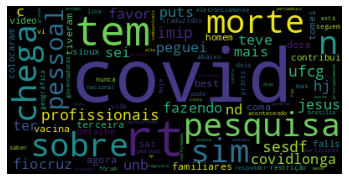

In [39]:
word_cloud = WordCloud()
word_cloud.generate(string)
plt.imshow(word_cloud)
plt.axis("off");

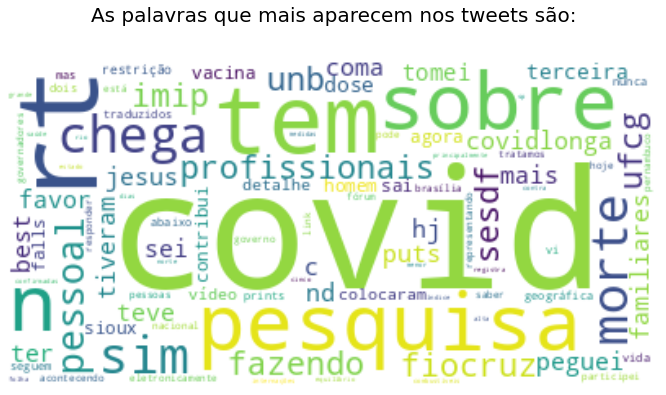

In [72]:
fig, ax = plt.subplots(figsize=(20,6))
word_cloud = WordCloud(background_color = 'white')
word_cloud.generate(string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('As palavras que mais aparecem nos tweets são:',
         size=20,pad=40,loc='center')
plt.axis("off");

In [44]:
response[0]

['RT @JohnnyCiocca: Pessoal, tem profissionais da SES/DF, IMIP, UFCG, Fiocruz e UnB fazendo uma pesquisa sobre #COVIDLonga. Se você já teve C…',
 'se eu n peguei covid hj n sei mais de nd puts',
 'por favor jesus já chega\nhttps://t.co/RoWfgqPsqD',
 '@inesdealmeida90 E ter familiares que tiveram em coma com covid? Do best…',
 'tomei minha terceira dose agora sim sai covid',
 '@unb_oficial "Vacina COVID-19 contribui para a morte de homem em Sioux Falls"\n\nDetalhe: colocaram o vídeo com "restrição geográfica"!\nNunca vi isso na vida!\nMas abaixo seguem dois "prints" traduzidos eletronicamente. As pessoas tem sim que saber o que está acontecendo!\nhttps://t.co/PQIphPUxTk https://t.co/CLjv454yP8',
 'RT @maestrobilly: Você pode responder essa pesquisa sobre COVID do @JohnnyCiocca?\nLink - https://t.co/eyMXrea3NN',
 'Participei hoje, em Brasília, do Fórum Nacional dos Governadores, representando o governo de Pernambuco. Tratamos, principalmente, da alta dos combustíveis e de medidas contra 